<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/%E5%AF%A6%E4%BD%9CRNN%E9%A0%90%E6%B8%ACDOW2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#coding=utf-8
import pandas as pd
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline


In [0]:
%tensorflow_version 2.x

In [38]:
from google.colab import files
uploaded = files.upload()

Saving data3.csv to data3 (1).csv


In [0]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['data3.csv']))

In [40]:
df1

,Date,MMM,KO,CVX,CAT,BA,AXP,AAPL,XOM,WMT,WBA,VZ,UNH,TRV,PG,NIKE,MSFT,MRK,JPM,JNJ,INTC,IBM,HD,DIS,MCD,SP,NASDAQ,DOW,BP
0,1987/5/20,15.875000,2.437500,14.125000,6.375000,9.500000,8.239491,72240000,10.921875,3.328125,2.171875,13.967607,0.183594,10.625000,5.515625,0.238281,0.380208,8.270833,13.208333,5.156250,0.869792,39.156250,0.663923,4.932500,6.270833,278.209991,406.600006,2215.870117,18.63
1,1987/5/21,15.781250,2.421875,14.156250,6.406250,9.500000,8.496975,43450400,10.906250,3.453125,2.171875,13.827087,0.183594,10.687500,5.406250,0.242188,0.387153,8.375000,13.708333,5.164063,0.869792,39.312500,0.672154,5.014709,6.354167,280.170013,408.500000,2225.770020,18.45
2,1987/5/22,15.859375,2.492188,14.125000,6.437500,9.611111,8.529160,24276000,10.843750,3.492188,2.171875,14.164333,0.183594,10.687500,5.500000,0.242188,0.375868,8.500000,13.916667,5.187500,0.830729,39.156250,0.674897,5.024984,6.552083,282.160004,407.399994,2243.199951,18.55
3,1987/5/26,16.156250,2.609375,14.312500,6.609375,9.694445,9.011943,38063200,10.984375,3.562500,2.210938,14.445372,0.187500,11.000000,5.773438,0.242188,0.380208,8.479167,14.375000,5.289063,0.885417,40.156250,0.688615,5.220229,6.718750,289.109985,411.399994,2297.939941,18.63
4,1987/5/27,16.187500,2.578125,14.343750,6.734375,10.055555,8.915386,45175200,10.937500,3.593750,2.226563,14.726410,0.183594,11.062500,5.710938,0.246094,0.380208,8.583333,14.000000,5.273438,0.885417,40.250000,0.732510,5.261333,6.708333,288.730011,412.600006,2295.810059,18.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2011/2/28,92.230003,31.959999,103.750000,102.930000,72.010002,43.570000,100768500,85.529999,51.980000,43.340000,36.919998,42.580002,59.930000,63.049999,22.257500,26.580000,32.570000,46.689999,61.439999,21.469999,161.880005,37.470001,43.740002,75.680000,1327.219971,2782.270020,12226.339840,116.14
5996,2011/3/1,90.459999,32.455002,102.900002,99.860001,70.120003,43.150002,114034200,84.800003,52.070000,42.720001,36.020000,42.450001,59.220001,62.740002,21.924999,26.160000,32.459999,45.599998,60.700001,21.389999,159.970001,36.759998,42.990002,74.889999,1306.329956,2737.409912,12058.019530,118.43
5997,2011/3/2,91.320000,32.215000,103.470001,100.970001,69.570000,43.020000,150647700,85.080002,51.970001,41.840000,36.340000,43.560001,58.810001,62.410000,22.082500,26.080000,32.580002,45.209999,60.810001,21.490000,160.160004,36.660000,43.290001,74.690002,1308.439941,2748.070068,12066.799810,119.95
5998,2011/3/3,92.809998,32.785000,104.190002,104.250000,71.709999,44.299999,125197100,85.820000,52.009998,42.529999,36.360001,44.790001,59.049999,62.549999,22.459999,26.200001,33.099998,46.080002,61.049999,21.790001,163.479996,37.549999,44.070000,76.239998,1330.969971,2798.739990,12258.200200,118.71


In [0]:
def normalize(df):
    norm = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    return norm
def train_windows(df, ref_day=5, predict_day=5):
    X_train, Y_train = [], []
    for i in range(df.shape[0]-predict_day-ref_day):
        X_train.append(np.array(df.iloc[i:i+ref_day,:-1]))
        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day]["y"]))
    return np.array(X_train), np.array(Y_train)
def lstm_stock_model(shape):
    model = Sequential()
    model.add(LSTM(256, input_shape=(shape[1], shape[2]), return_sequences=True))
    model.add(LSTM(256, return_sequences=True))
    model.add(TimeDistributed(Dense(5)))
    model.add(Flatten())
    model.add(Dense(5,activation='sigmoid'))
    model.add(Dense(5,activation='sigmoid'))
    model.compile(loss="mean_absolute_error", optimizer="adam",metrics=['mean_absolute_error'])
    model.summary()
    return model

In [0]:
df1 = df1.dropna()
df1['y'] = df1['DOW'].shift(-1)

In [0]:
df1.iloc[:,[1,2,3,4,5,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]=normalize(df1.iloc[:,[1,2,3,4,5,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]])

In [44]:
df1

,Date,MMM,KO,CVX,CAT,BA,AXP,AAPL,XOM,WMT,WBA,VZ,UNH,TRV,PG,NIKE,MSFT,MRK,JPM,JNJ,INTC,IBM,HD,DIS,MCD,SP,NASDAQ,DOW,BP,y
0,1987/5/20,0.028840,0.012630,0.052596,0.015463,0.018688,0.061161,0.038624,0.029384,0.010524,0.011279,0.007471,0.001533,0.019495,0.023713,0.000171,0.001815,0.002160,0.157860,0.016498,0.004135,0.185534,0.003513,0.028567,0.022746,0.040478,0.024113,0.038398,0.070671,0.039195
1,1987/5/21,0.027702,0.012259,0.052924,0.015772,0.018688,0.065379,0.023103,0.029204,0.012395,0.011279,0.004598,0.001533,0.020714,0.022169,0.000342,0.001933,0.003361,0.165886,0.016613,0.004135,0.186537,0.003634,0.030607,0.023845,0.041939,0.024513,0.039195,0.069336,0.040598
2,1987/5/22,0.028651,0.013930,0.052596,0.016082,0.019803,0.065906,0.012765,0.028483,0.012979,0.011279,0.011494,0.001533,0.020714,0.023492,0.000342,0.001742,0.004801,0.169231,0.016957,0.003609,0.185534,0.003674,0.030862,0.026456,0.043423,0.024281,0.040598,0.070078,0.045003
3,1987/5/26,0.032256,0.016716,0.054568,0.017782,0.020640,0.073815,0.020198,0.030105,0.014032,0.012062,0.017241,0.001594,0.026806,0.027353,0.000342,0.001815,0.004561,0.176589,0.018446,0.004345,0.191953,0.003875,0.035709,0.028655,0.048605,0.025122,0.045003,0.070671,0.044832
4,1987/5/27,0.032635,0.015973,0.054897,0.019020,0.024266,0.072233,0.024033,0.029564,0.014500,0.012376,0.022988,0.001533,0.028024,0.026470,0.000513,0.001815,0.005761,0.170569,0.018217,0.004345,0.192555,0.004517,0.036729,0.028518,0.048321,0.025375,0.044832,0.070449,0.046028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2011/2/28,0.956041,0.714502,0.995372,0.971004,0.646354,0.639932,0.054005,0.890164,0.738709,0.836778,0.476839,0.667054,0.980700,0.835955,0.964208,0.443708,0.282132,0.695358,0.841909,0.281346,0.973235,0.542196,0.991809,0.938517,0.822603,0.523548,0.844019,0.793771,0.830473
5996,2011/3/1,0.934548,0.726270,0.986430,0.940622,0.627376,0.633052,0.061157,0.881742,0.740056,0.824346,0.458434,0.665014,0.966858,0.831578,0.949651,0.436624,0.280864,0.677860,0.831057,0.280269,0.960976,0.531804,0.973193,0.928094,0.807028,0.514117,0.830473,0.810753,0.831179
5997,2011/3/2,0.944991,0.720565,0.992426,0.951607,0.621854,0.630922,0.080897,0.884973,0.738559,0.806700,0.464978,0.682438,0.958865,0.826919,0.956547,0.435275,0.282247,0.671599,0.832670,0.281615,0.962195,0.530341,0.980640,0.925455,0.808601,0.516358,0.831179,0.822024,0.846583
5998,2011/3/3,0.963084,0.734116,1.000000,0.984067,0.643342,0.651891,0.067176,0.893510,0.739158,0.820536,0.465387,0.701746,0.963544,0.828896,0.973074,0.437299,0.288238,0.685565,0.836190,0.285652,0.983504,0.543366,1.000000,0.945905,0.825399,0.527010,0.846583,0.812829,0.839475


In [0]:
df1 = df1.dropna()

In [46]:
from google.colab import files
uploaded = files.upload()

Saving test3.csv to test3 (1).csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['test3.csv']))

In [0]:
df2 = df2.dropna()
df2['y'] = df2['DOW'].shift(-1)

In [0]:
df2.iloc[:,[1,2,3,4,5,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]=normalize(df2.iloc[:,[1,2,3,4,5,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]])

In [50]:
df2

,Date,MMM,KO,CVX,CAT,BA,AXP,AAPL,XOM,WMT,WBA,VZ,UNH,TRV,PG,NIKE,MSFT,MRK,JPM,JNJ,INTC,IBM,HD,DIS,MCD,SP,NASDAQ,DOW,BP,y
0,2011/3/7,0.114385,0.072487,0.508869,0.391397,0.035150,0.015659,0.342770,0.494212,0.049540,0.189984,0.099827,0.006729,0.112561,0.047351,0.040408,0.014681,0.048530,0.149144,0.030283,0.048499,0.483784,0.039745,0.114318,0.022273,0.097701,0.060654,0.078773,0.929971,0.085600
1,2011/3/8,0.121577,0.080897,0.520592,0.409099,0.038178,0.033407,0.212826,0.491124,0.055304,0.197961,0.116062,0.007792,0.113487,0.052382,0.041218,0.016069,0.050940,0.159879,0.033709,0.046579,0.505498,0.040553,0.115786,0.017211,0.103117,0.063635,0.085600,0.878910,0.085529
2,2011/3/9,0.118487,0.080497,0.495450,0.393432,0.038308,0.031203,0.279226,0.485464,0.058460,0.201211,0.121934,0.010389,0.116634,0.051643,0.040498,0.015923,0.055922,0.161299,0.030283,0.048259,0.538575,0.043549,0.115134,0.018831,0.102283,0.061555,0.085529,0.879090,0.072985
3,2011/3/10,0.101652,0.073889,0.448249,0.358293,0.036220,0.019255,0.316355,0.408284,0.058186,0.191609,0.113299,0.007634,0.108488,0.044096,0.038188,0.012417,0.049655,0.152160,0.021552,0.038415,0.503095,0.040696,0.109834,0.024906,0.090743,0.054051,0.072985,0.870550,0.076268
4,2011/3/11,0.110176,0.064277,0.461360,0.372721,0.037134,0.022271,0.291395,0.427322,0.057362,0.191166,0.094300,0.006847,0.111821,0.044096,0.035158,0.014389,0.046923,0.154024,0.022436,0.040336,0.506883,0.041029,0.113584,0.025243,0.094991,0.056211,0.076268,0.856796,0.073454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2019/12/27,0.566489,0.983180,0.775567,0.799876,0.711699,0.960793,0.069022,0.112683,0.976808,0.443640,0.981347,1.000000,0.833102,1.000000,0.992440,0.987875,0.991322,0.982699,0.973585,0.981753,0.255936,0.910241,0.951973,0.844897,0.991740,0.987335,0.987727,0.125584,0.977673
2219,2019/12/30,0.558871,0.979976,0.768626,0.793149,0.701939,0.950470,0.067549,0.102135,0.974201,0.442015,0.970294,0.991658,0.830232,0.976028,0.983201,0.977869,0.983770,0.978174,0.968612,0.970708,0.233207,0.897594,0.935828,0.836393,0.983063,0.978361,0.977673,0.115876,0.981862
2220,2019/12/31,0.562014,0.983180,0.778806,0.794565,0.700269,0.952674,0.037899,0.109853,0.966516,0.442754,0.976857,0.992169,0.834490,0.982391,0.989321,0.978672,0.982484,0.985006,0.974912,0.976230,0.244572,0.902681,0.942841,0.841118,0.987460,0.982300,0.981862,0.123876,1.000000
2221,2020/1/2,0.581087,0.968763,0.792997,0.819791,0.719997,0.968449,0.061638,0.138667,0.967888,0.444527,0.964767,0.986345,0.839674,0.960343,1.000000,1.000000,1.000000,1.000000,0.976017,1.000000,0.257322,0.908767,0.971950,0.862581,1.000000,1.000000,1.000000,0.124056,0.987157


In [0]:
df2 = df2.dropna()


In [52]:
df1.drop(['Date'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
df2.drop(['Date'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
df1

,MMM,KO,CVX,CAT,BA,AXP,AAPL,XOM,WMT,WBA,VZ,UNH,TRV,PG,NIKE,MSFT,MRK,JPM,JNJ,INTC,IBM,HD,DIS,MCD,SP,NASDAQ,DOW,BP,y
0,0.028840,0.012630,0.052596,0.015463,0.018688,0.061161,0.038624,0.029384,0.010524,0.011279,0.007471,0.001533,0.019495,0.023713,0.000171,0.001815,0.002160,0.157860,0.016498,0.004135,0.185534,0.003513,0.028567,0.022746,0.040478,0.024113,0.038398,0.070671,0.039195
1,0.027702,0.012259,0.052924,0.015772,0.018688,0.065379,0.023103,0.029204,0.012395,0.011279,0.004598,0.001533,0.020714,0.022169,0.000342,0.001933,0.003361,0.165886,0.016613,0.004135,0.186537,0.003634,0.030607,0.023845,0.041939,0.024513,0.039195,0.069336,0.040598
2,0.028651,0.013930,0.052596,0.016082,0.019803,0.065906,0.012765,0.028483,0.012979,0.011279,0.011494,0.001533,0.020714,0.023492,0.000342,0.001742,0.004801,0.169231,0.016957,0.003609,0.185534,0.003674,0.030862,0.026456,0.043423,0.024281,0.040598,0.070078,0.045003
3,0.032256,0.016716,0.054568,0.017782,0.020640,0.073815,0.020198,0.030105,0.014032,0.012062,0.017241,0.001594,0.026806,0.027353,0.000342,0.001815,0.004561,0.176589,0.018446,0.004345,0.191953,0.003875,0.035709,0.028655,0.048605,0.025122,0.045003,0.070671,0.044832
4,0.032635,0.015973,0.054897,0.019020,0.024266,0.072233,0.024033,0.029564,0.014500,0.012376,0.022988,0.001533,0.028024,0.026470,0.000513,0.001815,0.005761,0.170569,0.018217,0.004345,0.192555,0.004517,0.036729,0.028518,0.048321,0.025375,0.044832,0.070449,0.046028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,0.931998,0.719138,0.978015,0.961800,0.649266,0.639277,0.050898,0.887972,0.735267,0.809307,0.457412,0.666112,0.974266,0.832990,0.952716,0.443202,0.277753,0.695197,0.815512,0.286594,0.975802,0.536488,0.972200,0.922157,0.817131,0.523291,0.836302,0.788283,0.844019
5995,0.956041,0.714502,0.995372,0.971004,0.646354,0.639932,0.054005,0.890164,0.738709,0.836778,0.476839,0.667054,0.980700,0.835955,0.964208,0.443708,0.282132,0.695358,0.841909,0.281346,0.973235,0.542196,0.991809,0.938517,0.822603,0.523548,0.844019,0.793771,0.830473
5996,0.934548,0.726270,0.986430,0.940622,0.627376,0.633052,0.061157,0.881742,0.740056,0.824346,0.458434,0.665014,0.966858,0.831578,0.949651,0.436624,0.280864,0.677860,0.831057,0.280269,0.960976,0.531804,0.973193,0.928094,0.807028,0.514117,0.830473,0.810753,0.831179
5997,0.944991,0.720565,0.992426,0.951607,0.621854,0.630922,0.080897,0.884973,0.738559,0.806700,0.464978,0.682438,0.958865,0.826919,0.956547,0.435275,0.282247,0.671599,0.832670,0.281615,0.962195,0.530341,0.980640,0.925455,0.808601,0.516358,0.831179,0.822024,0.846583


In [55]:
df2

,MMM,KO,CVX,CAT,BA,AXP,AAPL,XOM,WMT,WBA,VZ,UNH,TRV,PG,NIKE,MSFT,MRK,JPM,JNJ,INTC,IBM,HD,DIS,MCD,SP,NASDAQ,DOW,BP,y
0,0.114385,0.072487,0.508869,0.391397,0.035150,0.015659,0.342770,0.494212,0.049540,0.189984,0.099827,0.006729,0.112561,0.047351,0.040408,0.014681,0.048530,0.149144,0.030283,0.048499,0.483784,0.039745,0.114318,0.022273,0.097701,0.060654,0.078773,0.929971,0.085600
1,0.121577,0.080897,0.520592,0.409099,0.038178,0.033407,0.212826,0.491124,0.055304,0.197961,0.116062,0.007792,0.113487,0.052382,0.041218,0.016069,0.050940,0.159879,0.033709,0.046579,0.505498,0.040553,0.115786,0.017211,0.103117,0.063635,0.085600,0.878910,0.085529
2,0.118487,0.080497,0.495450,0.393432,0.038308,0.031203,0.279226,0.485464,0.058460,0.201211,0.121934,0.010389,0.116634,0.051643,0.040498,0.015923,0.055922,0.161299,0.030283,0.048259,0.538575,0.043549,0.115134,0.018831,0.102283,0.061555,0.085529,0.879090,0.072985
3,0.101652,0.073889,0.448249,0.358293,0.036220,0.019255,0.316355,0.408284,0.058186,0.191609,0.113299,0.007634,0.108488,0.044096,0.038188,0.012417,0.049655,0.152160,0.021552,0.038415,0.503095,0.040696,0.109834,0.024906,0.090743,0.054051,0.072985,0.870550,0.076268
4,0.110176,0.064277,0.461360,0.372721,0.037134,0.022271,0.291395,0.427322,0.057362,0.191166,0.094300,0.006847,0.111821,0.044096,0.035158,0.014389,0.046923,0.154024,0.022436,0.040336,0.506883,0.041029,0.113584,0.025243,0.094991,0.056211,0.076268,0.856796,0.073454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,0.562920,0.969964,0.780194,0.799345,0.711124,0.963345,0.032638,0.118858,0.975847,0.441867,0.973057,0.998741,0.828381,0.987126,0.982121,0.985757,0.988751,0.981812,0.974470,0.975510,0.252610,0.914282,0.951566,0.837406,0.991689,0.989669,0.986416,0.103200,0.987727
2218,0.566489,0.983180,0.775567,0.799876,0.711699,0.960793,0.069022,0.112683,0.976808,0.443640,0.981347,1.000000,0.833102,1.000000,0.992440,0.987875,0.991322,0.982699,0.973585,0.981753,0.255936,0.910241,0.951973,0.844897,0.991740,0.987335,0.987727,0.125584,0.977673
2219,0.558871,0.979976,0.768626,0.793149,0.701939,0.950470,0.067549,0.102135,0.974201,0.442015,0.970294,0.991658,0.830232,0.976028,0.983201,0.977869,0.983770,0.978174,0.968612,0.970708,0.233207,0.897594,0.935828,0.836393,0.983063,0.978361,0.977673,0.115876,0.981862
2220,0.562014,0.983180,0.778806,0.794565,0.700269,0.952674,0.037899,0.109853,0.966516,0.442754,0.976857,0.992169,0.834490,0.982391,0.989321,0.978672,0.982484,0.985006,0.974912,0.976230,0.244572,0.902681,0.942841,0.841118,0.987460,0.982300,0.981862,0.123876,1.000000


In [0]:
X_train, Y_train = train_windows(df1, 5, 5)
X_test, Y_test = train_windows(df2, 5, 5)

In [57]:
X_train

array([[[0.02884032, 0.01263001, 0.05259559, ..., 0.02411326,
         0.03839837, 0.07067112],
        [0.02770188, 0.01225854, 0.05292431, ..., 0.02451269,
         0.03919509, 0.0693363 ],
        [0.02865058, 0.01393018, 0.05259559, ..., 0.02428144,
         0.04059782, 0.07007786],
        [0.03225562, 0.0167162 , 0.05456793, ..., 0.02512235,
         0.04500317, 0.07067112],
        [0.03263509, 0.01597325, 0.05489665, ..., 0.02537463,
         0.04483176, 0.07044865]],

       [[0.02770188, 0.01225854, 0.05292431, ..., 0.02451269,
         0.03919509, 0.0693363 ],
        [0.02865058, 0.01393018, 0.05259559, ..., 0.02428144,
         0.04059782, 0.07007786],
        [0.03225562, 0.0167162 , 0.05456793, ..., 0.02512235,
         0.04500317, 0.07067112],
        [0.03263509, 0.01597325, 0.05489665, ..., 0.02537463,
         0.04483176, 0.07044865],
        [0.03320431, 0.01708767, 0.05489665, ..., 0.02575304,
         0.04602846, 0.07044865]],

       [[0.02865058, 0.01393018, 0.0

In [58]:
model = lstm_stock_model(X_train.shape)
callback = EarlyStopping(monitor="mean_absolute_error", patience=10, verbose=5, mode="auto")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 256)            291840    
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 5)              1285      
_________________________________________________________________
flatten_2 (Flatten)          (None, 25)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 130       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 30        
Total params: 818,597
Trainable params: 818,597
Non-trainable params: 0
________________________________________________

In [59]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=5, validation_split=0.1, callbacks=[callback],shuffle=True)

Train on 5390 samples, validate on 599 samples
Epoch 1/15
5390/5390 [==============================] - 23s 4ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - val_loss: 0.0705 - val_mean_absolute_error: 0.0705
Epoch 2/15
5390/5390 [==============================] - 22s 4ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - val_loss: 0.0823 - val_mean_absolute_error: 0.0823
Epoch 3/15
5390/5390 [==============================] - 23s 4ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0843 - val_mean_absolute_error: 0.0843
Epoch 4/15
5390/5390 [==============================] - 23s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - val_loss: 0.0853 - val_mean_absolute_error: 0.0853
Epoch 5/15
5390/5390 [==============================] - 23s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - val_loss: 0.1048 - val_mean_absolute_error: 0.1048
Epoch 6/15
5390/5390 [==============================] - 23s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - va

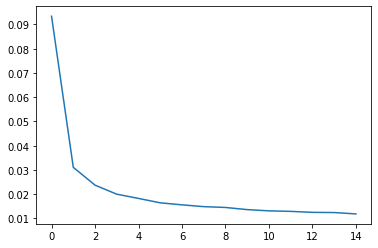

In [60]:
plt.plot(history.history['loss'])


In [0]:
real_stock_price = df2.iloc[:, [28]]

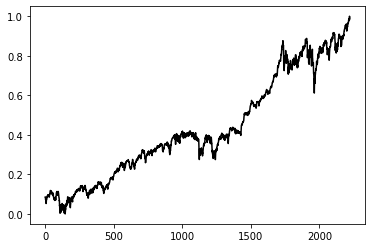

In [63]:
plt.plot(real_stock_price, color = 'black', label = 'DOW Stock Price')

In [0]:
predicted_stock_price = model.predict(X_test)

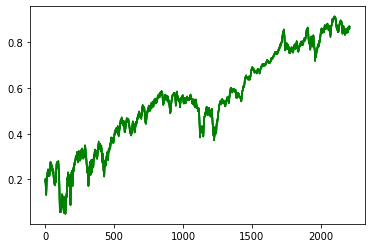

In [65]:
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted DOW Stock Price')

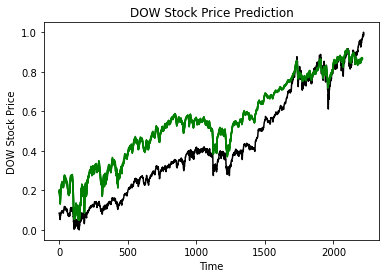

In [66]:
plt.plot(real_stock_price, color = 'black', label = 'DOW Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted DOW Stock Price')
plt.title('DOW Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('DOW Stock Price')
plt.show()